In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2431,ham,That's good. Lets thank God. Please complete t...,NaN,NaN,NaN
2481,ham,K.:)do it at evening da:)urgent:),NaN,NaN,NaN
3392,ham,Ok thanx...,NaN,NaN,NaN
962,ham,"Watching cartoon, listening music &amp; at eve...",NaN,NaN,NaN
3798,ham,"Actually nvm, got hella cash, we still on for ...",NaN,NaN,NaN


# 1.Data Cleaning

In [4]:
df = df[['v1','v2']]

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.sample()

,v1,v2
2884,ham,ÌÏ still attending da talks?


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
lb  = LabelEncoder()
df['target'] = lb.fit_transform(df['target'])


In [12]:
df.head()['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first',inplace=True)

# 2. EDA

<Axes: xlabel='target'>

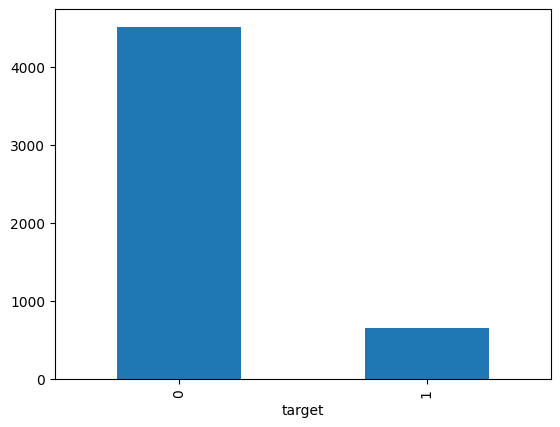

In [15]:
df['target'].value_counts().plot(kind='bar')

<Axes: ylabel='ham'>

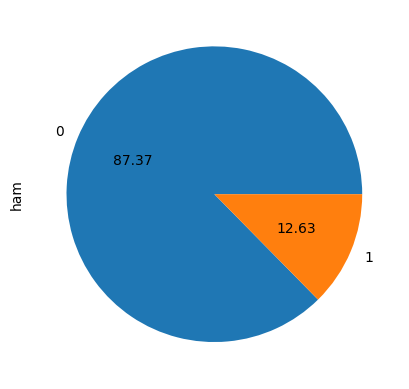

In [16]:
df['target'].value_counts().plot(kind='pie',autopct ='%0.2f',xlabel='spam',ylabel='ham')

In [17]:
import nltk

In [18]:
df['num_characters'] = df['text'].apply(lambda x: len(x))

In [19]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.sample(4)

,target,text,num_characters,num_words,num_sent
2190,0,"Ooh, 4got, i'm gonna start belly dancing in mo...",105,28,1
5265,0,Gud ni8.swt drms.take care,26,4,1
2555,1,FreeMSG You have been awarded a FREE mini DIGI...,156,31,3
450,0,hanks lotsly!,13,3,1


In [22]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
df[df['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
cols = ['num_characters','num_words','num_sent']

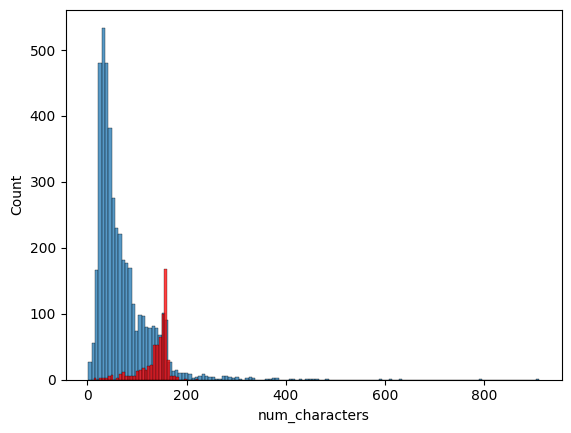

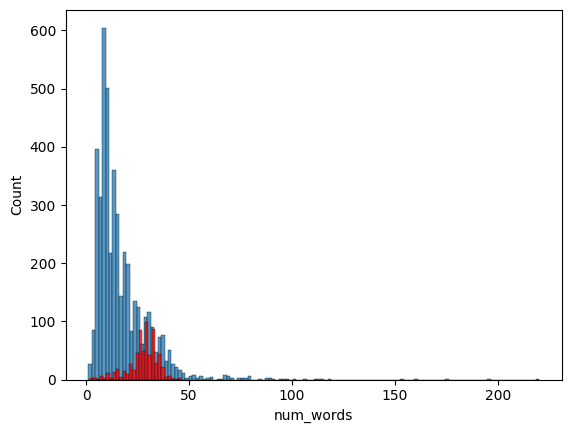

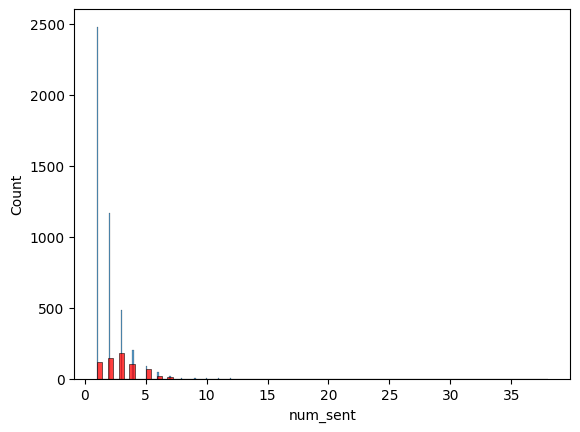

In [27]:
for col in cols:
    sns.histplot(df[df['target']==0][col])
    sns.histplot(df[df['target']==1][col],color='red')
    plt.show()

<Axes: >

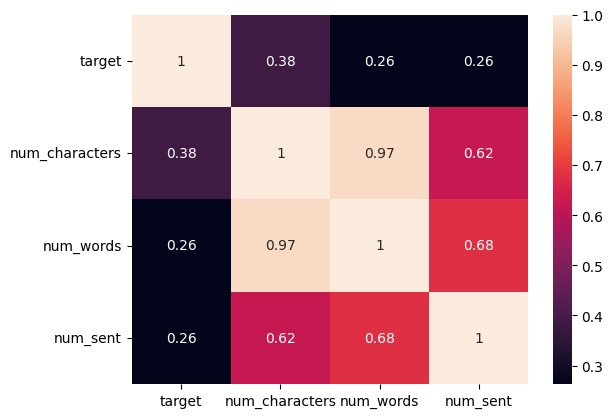

In [28]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)

# 3. Data Preprocessing

In [29]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [30]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()

    y =[]
    for i in text:
        if i.isalpha():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)



In [31]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [32]:
transform('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [33]:
df['transformed_text'] = df['text'].apply(transform)

In [34]:
df.sample()

,target,text,num_characters,num_words,num_sent,transformed_text
3217,0,Don know:)this week i'm going to tirunelvai da.,47,13,1,know week go tirunelvai da


In [35]:
spam_corpus = []
for mess in df[df['target']==1]['transformed_text'].to_list():
    for word in mess.split():
        spam_corpus.append(word)

In [36]:
len(spam_corpus)

8170

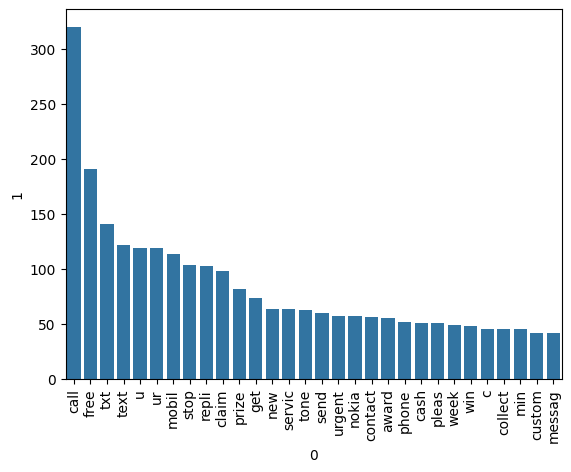

In [37]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
ham_corpus = []
for mess in df[df['target']==0]['transformed_text'].to_list():
    for word in mess.split():
        ham_corpus.append(word)

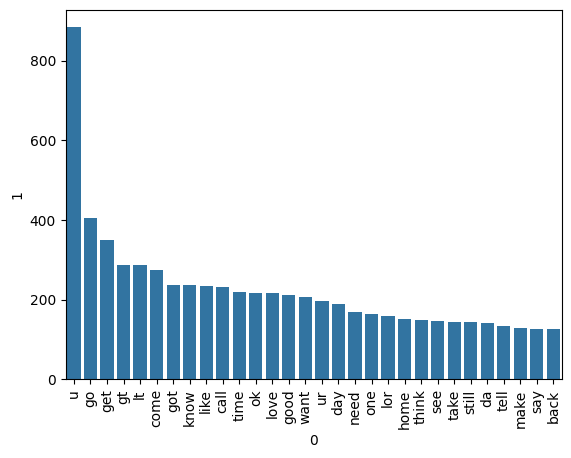

In [39]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [41]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [42]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [43]:
x[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
x.shape

(5169, 3000)

In [45]:
y = df['target'].values

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [48]:
models = [GaussianNB(),MultinomialNB(),BernoulliNB()]
accuracy = []
precision = []

In [49]:
for model in models:
    md = model
    md.fit(x_train,y_train)
    y_pred = md.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))

In [50]:
df_model = pd.DataFrame({'model':models,'accuracy':accuracy,'precision':precision})

In [51]:
df_model.head()

,model,accuracy,precision
0,GaussianNB(),0.855899,0.491597
1,MultinomialNB(),0.972921,0.991597
2,BernoulliNB(),0.974855,0.961240


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [54]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [55]:
def train_classifier(clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision


In [56]:
accuracy.clear()
precision.clear()

In [57]:
accuracy =[]
precision= []
for name,clf in clfs.items():
    a,p = train_classifier(clf)
    accuracy.append(a)
    precision.append(p)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [58]:
model_df = pd.DataFrame({'model': clfs.keys(),'accuracy':accuracy,'precision':precision})

In [59]:
model_df[model_df['accuracy']>0.97]

,model,accuracy,precision
0,SVC,0.976789,0.954887
2,NB,0.972921,0.991597
5,RF,0.970019,0.991379
8,ETC,0.972921,0.968000


In [60]:
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
etc = ExtraTreesClassifier(n_estimators=50,random_state=42)
mnb = MultinomialNB()

In [61]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('SVC',svc),('ETC',etc),('MNB',mnb)],voting='soft')

In [62]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=42)),
                             ('MNB', MultinomialNB())],
                 voting='soft')

In [63]:
y_pred = vc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9806576402321083
0.9921259842519685


In [64]:
import pickle
pickle.dump(vc,open('spam.pkl','wb'))